In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [2]:
url='bank-additional-full.csv'
urln='bank-additional-names.txt'

In [3]:
btd = pd.read_csv(url, delimiter = ';')
btd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
btd = btd.drop(['day_of_week'], axis=1)

In [5]:
for col in btd.select_dtypes(include='object').columns:
    print(col)
    print(btd[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [6]:
btd1=btd.rename(columns={"y": "subscribe"})
btd1

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
btd1['subscribe'] = btd1['subscribe'].replace({'no':0,'yes':1})

In [8]:
btd1

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [9]:
features_na = [features for features in btd1.columns if btd1[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(btd2[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [10]:
categorical_features=[feature for feature in btd1.columns if ((btd1[feature].dtypes=='O') & (feature not in ['subscribe']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(btd1[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is poutcome and number of categories are 3


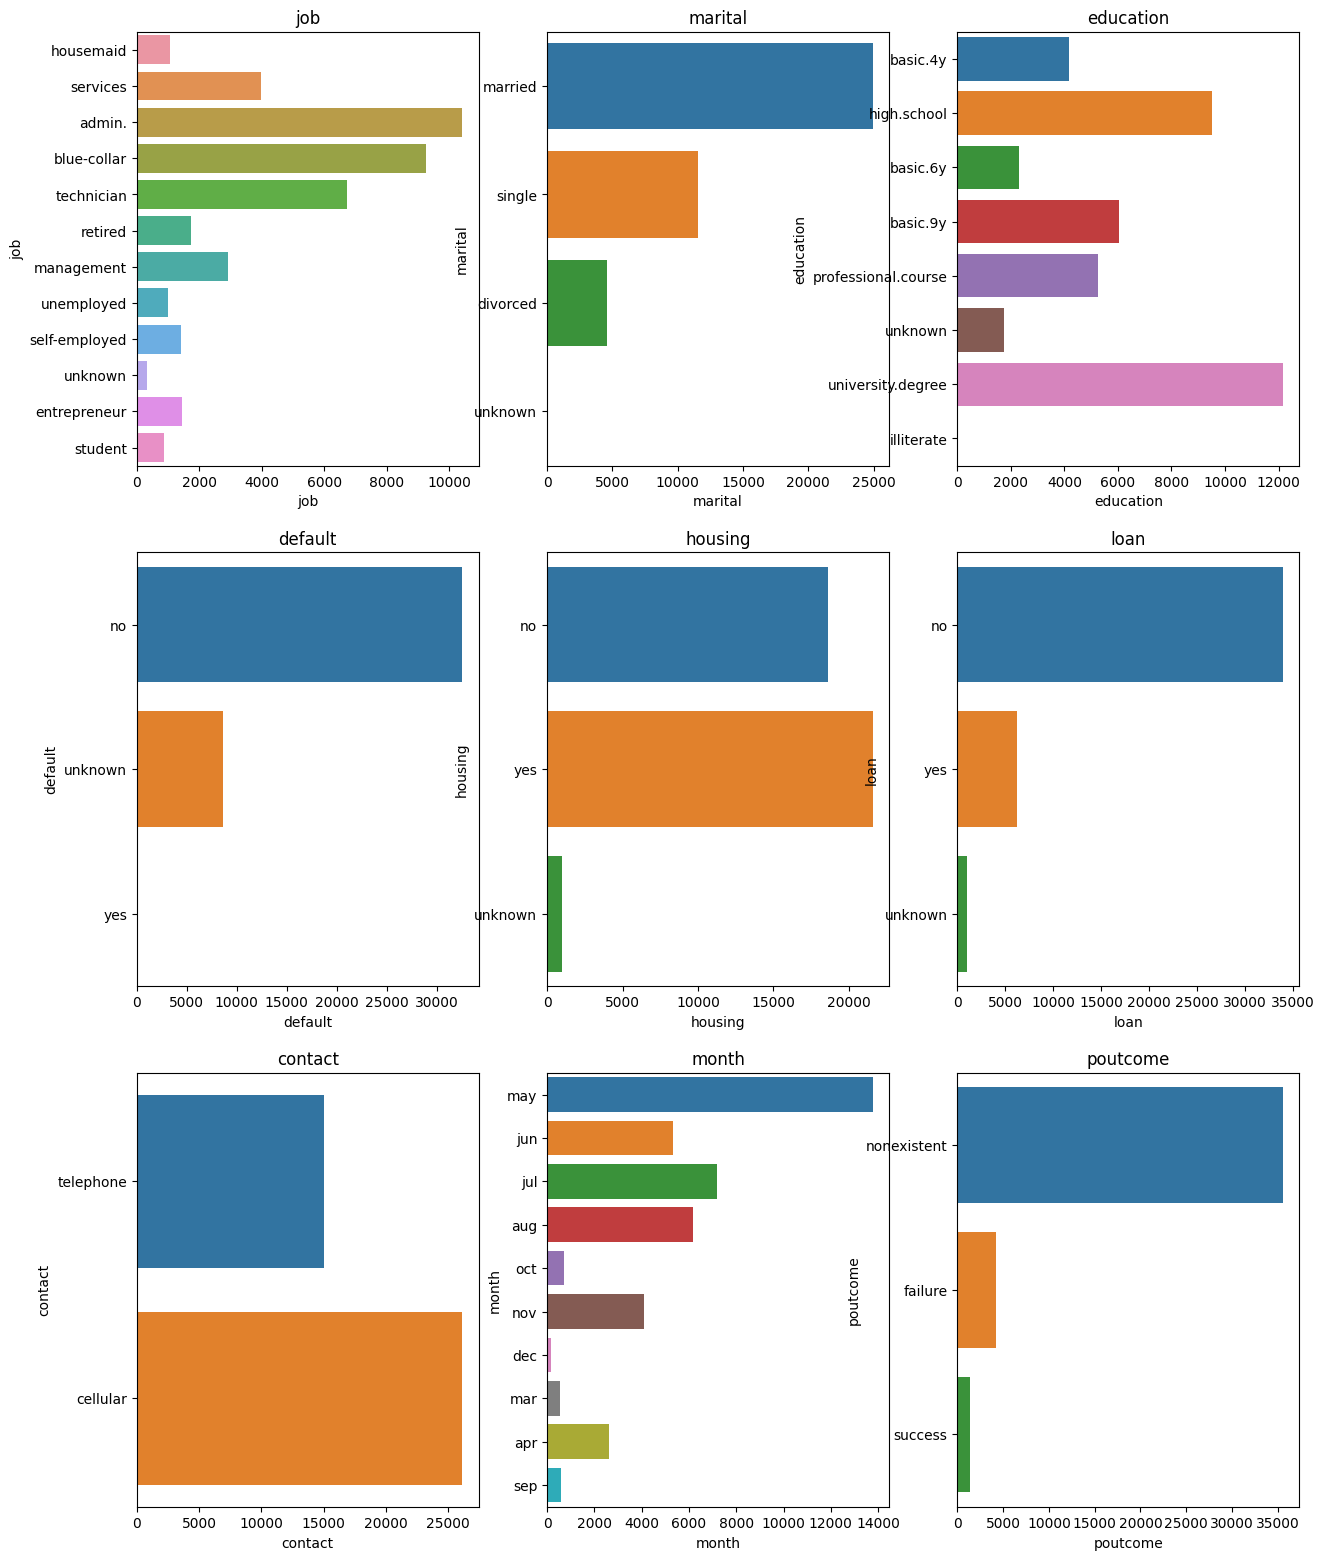

In [12]:
plt.figure(figsize=(15,80))
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=btd1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [13]:
btd1["default"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: default, Length: 41188, dtype: bool

In [14]:
numerical_features = [feature for feature in btd1.columns if ((btd1[feature].dtypes != 'O') & (feature not in ['subscribe']))]
print('Number of numerical variables: ', len(numerical_features))

btd1[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [15]:
discrete_feature=[feature for feature in numerical_features if len(btd1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [16]:
for categorical_feature in categorical_features:
    print(btd1.groupby(['subscribe',categorical_feature]).size())

subscribe  job          
0          admin.           9070
           blue-collar      8616
           entrepreneur     1332
           housemaid         954
           management       2596
           retired          1286
           self-employed    1272
           services         3646
           student           600
           technician       6013
           unemployed        870
           unknown           293
1          admin.           1352
           blue-collar       638
           entrepreneur      124
           housemaid         106
           management        328
           retired           434
           self-employed     149
           services          323
           student           275
           technician        730
           unemployed        144
           unknown            37
dtype: int64
subscribe  marital 
0          divorced     4136
           married     22396
           single       9948
           unknown        68
1          divorced      476
     

In [17]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['subscribe']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


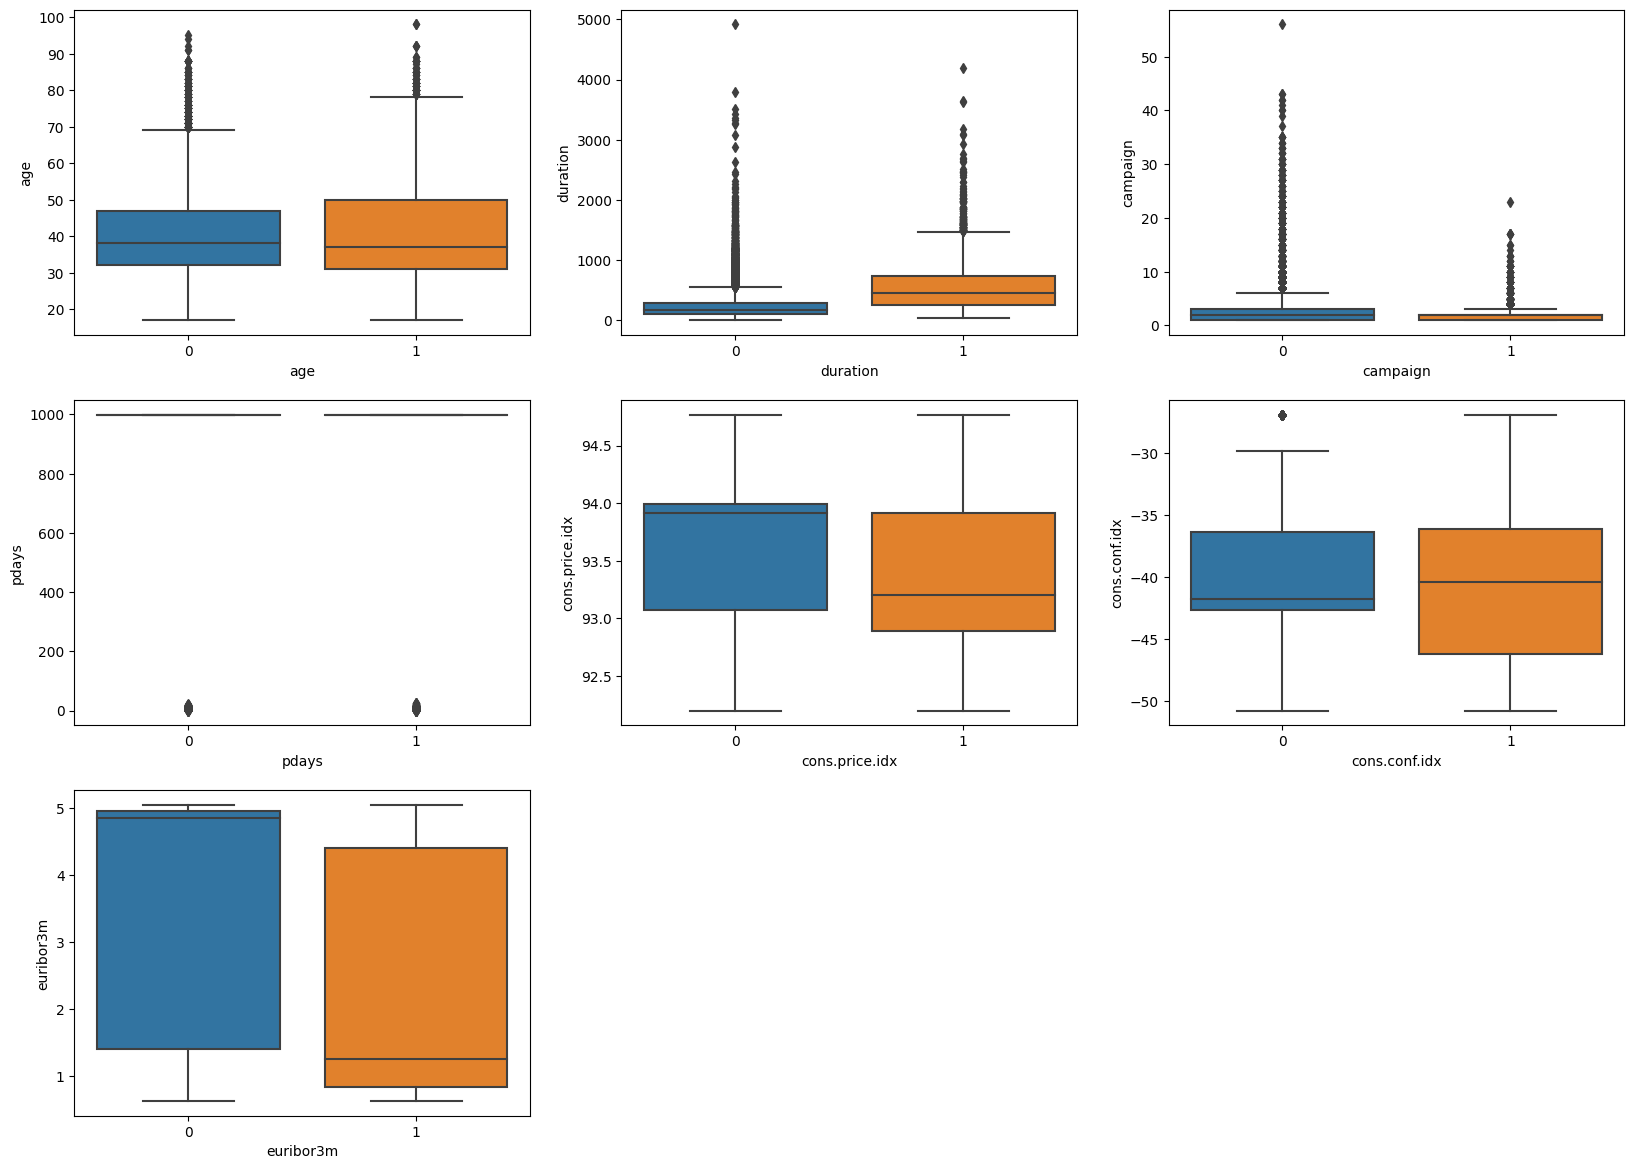

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribe", y= btd1[feature], data=btd1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

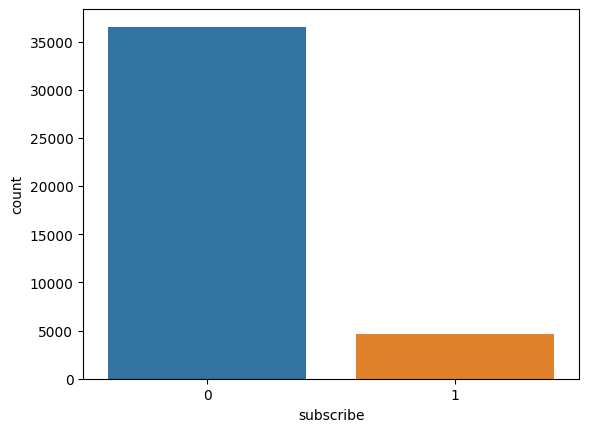

In [19]:
sns.countplot(x='subscribe',data=btd1)
plt.show()

In [20]:
btd1['subscribe'].groupby(btd1['subscribe']).count()

subscribe
0    36548
1     4640
Name: subscribe, dtype: int64

In [21]:
btd1.groupby(['subscribe','default']).size()

subscribe  default
0          no         28391
           unknown     8154
           yes            3
1          no          4197
           unknown      443
dtype: int64

In [22]:
btd1.drop(['default'],axis=1, inplace=True)
btd1.groupby(['subscribe','pdays']).size()

subscribe  pdays
0          0            5
           1           18
           2           24
           3          141
           4           55
           5           17
           6          123
           7           20
           8            6
           9           29
           10          22
           11          13
           12          32
           13           8
           14           9
           15           8
           16           5
           17           6
           18           3
           19           2
           20           1
           22           1
           999      36000
1          0           10
           1            8
           2           37
           3          298
           4           63
           5           29
           6          289
           7           40
           8           12
           9           35
           10          30
           11          15
           12          26
           13          28
           14        

In [23]:
btd1.groupby(['subscribe','duration'],sort=True)['duration'].count()
btd1.groupby(['subscribe','campaign'],sort=True)['campaign'].count()

subscribe  campaign
0          1           15342
           2            9359
           3            4767
           4            2402
           5            1479
           6             904
           7             591
           8             383
           9             266
           10            213
           11            165
           12            122
           13             88
           14             68
           15             49
           16             51
           17             54
           18             33
           19             26
           20             30
           21             24
           22             17
           23             15
           24             15
           25              8
           26              8
           27             11
           28              8
           29             10
           30              7
           31              7
           32              4
           33              4
           34          

In [24]:
# excluding outliers
btd2 = btd1[btd1['campaign'] < 33]
btd2.groupby(['subscribe','campaign'],sort=True)['campaign'].count()

subscribe  campaign
0          1           15342
           2            9359
           3            4767
           4            2402
           5            1479
           6             904
           7             591
           8             383
           9             266
           10            213
           11            165
           12            122
           13             88
           14             68
           15             49
           16             51
           17             54
           18             33
           19             26
           20             30
           21             24
           22             17
           23             15
           24             15
           25              8
           26              8
           27             11
           28              8
           29             10
           30              7
           31              7
           32              4
1          1            2300
           2           

In [25]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    btd2 = pd.concat([btd2.drop(col, axis=1),pd.get_dummies(btd2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [26]:
btd2['housing'] = btd2['housing'].map({'yes': 1, 'no': 0})
btd2['housing']=btd2['housing'].replace({'unknown' :np.NaN})

In [27]:
btd2.replace({True: 1, False: 0})

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,no,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
1,57,0.0,no,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
2,37,1.0,no,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
3,40,0.0,no,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
4,56,0.0,yes,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,no,334,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41184,46,0.0,no,383,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41185,56,1.0,no,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0
41186,44,0.0,no,442,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,0,1,0,0,1,0


In [28]:
btd2['loan'] = btd2['loan'].map({'yes': 1, 'no': 0})
btd2['loan']=btd2['loan'].replace({'unknown' :np.NaN})

In [29]:
btd2

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
1,57,0.0,0.0,149,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
2,37,1.0,0.0,226,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
3,40,0.0,0.0,151,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
4,56,0.0,1.0,307,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,0.0,334,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41184,46,0.0,0.0,383,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41185,56,1.0,0.0,189,2,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41186,44,0.0,0.0,442,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False


In [30]:
btd2.dropna(subset=['housing'], inplace=True)
btd2.dropna(subset=['loan'], inplace=True)

In [31]:
btd2

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
1,57,0.0,0.0,149,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
2,37,1.0,0.0,226,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
3,40,0.0,0.0,151,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
4,56,0.0,1.0,307,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,0.0,334,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41184,46,0.0,0.0,383,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41185,56,1.0,0.0,189,2,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False
41186,44,0.0,0.0,442,1,999,0,-1.1,94.767,-50.8,...,False,False,False,False,False,True,False,False,True,False


In [32]:
btd2.isnull().sum().sum()

0

In [33]:
for col in btd2.select_dtypes(include='float').columns:
    print(col)
    print(btd2[col].unique())

housing
[0. 1.]
loan
[0. 1.]
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479

In [34]:
btd2.head().replace({True: 1, False: 0})

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
1,57,0.0,0.0,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
2,37,1.0,0.0,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
3,40,0.0,0.0,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
4,56,0.0,1.0,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0


In [35]:
X = btd2.drop(['subscribe'],axis=1)
y = btd2['subscribe']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

<Axes: ylabel='count'>

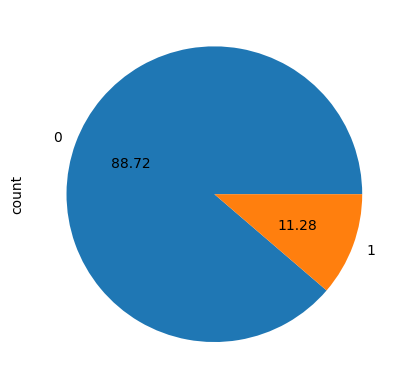

In [36]:
y.value_counts().plot.pie(autopct='%.2f')

In [37]:
len(X_train)

28123

In [38]:
len(X_test)

12054

# OverSampling

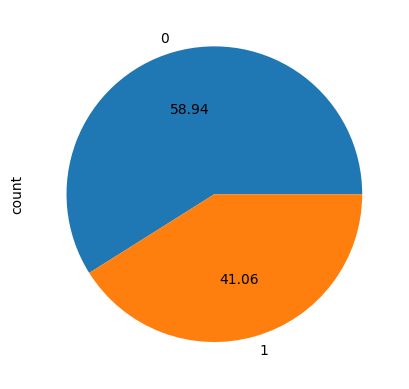

In [39]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42, sampling_strategy= 0.7)
X_res,y_res=smk.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')

In [40]:
X_res.shape,y_res.shape

((59820, 45), (59820,))

In [41]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 35644, 1: 4533})
Resampled dataset shape Counter({0: 35257, 1: 24563})


In [42]:

os =  RandomOverSampler(random_state=42)
X_train_res, y_train_res = os.fit_resample(X,y)

In [43]:
X_train_res.shape, y_train_res.shape

((71288, 45), (71288,))

In [44]:
y_res.value_counts()

subscribe
0    35257
1    24563
Name: count, dtype: int64

In [45]:
# Slicing the data into 5 parts and showing mean value
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train_res, y=y_train_res, cv=5)
print(model_score)
print(model_score.mean())

[0.76188806 0.70318418 0.94732782 0.58827243 0.5219892 ]
0.7045323363953692


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_res = le.fit_transform(y_train_res)

In [47]:
# slicing for XGBClassifier algorithm
from xgboost import XGBClassifier
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train_res, y=y_train_res, cv=5)
print(model_score)
print(model_score.mean())

[0.69210268 0.8518025  0.90475523 0.57704987 0.50725959]
0.7065939726393887


In [48]:
# to get best parameters, performing hyperparameter technique for gridsearchcv
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [49]:
# gridsearch for best parameters
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier()

param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

grid_search_model.fit(x_train, y_train)

print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35257
           1       1.00      0.86      0.92     24563

    accuracy                           0.94     59820
   macro avg       0.95      0.93      0.94     59820
weighted avg       0.95      0.94      0.94     59820

ROC_AUC_SCORE is 0.9276961283230876


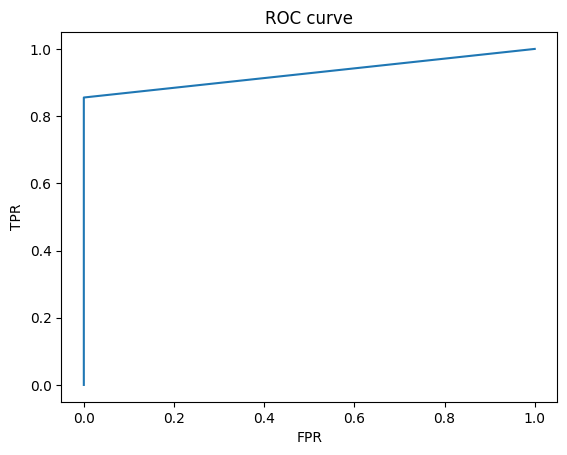

In [50]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)
y_scores = model.predict(X_res)
auc = roc_auc_score(y_res, y_scores)
# print('Classification Report:')
print(classification_report(y_res,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_res, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_res, y_scores))
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [51]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [52]:
model_xgb.fit(X_train_res,y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
model_xgb.score(X_res,y_res)

0.9345536609829489

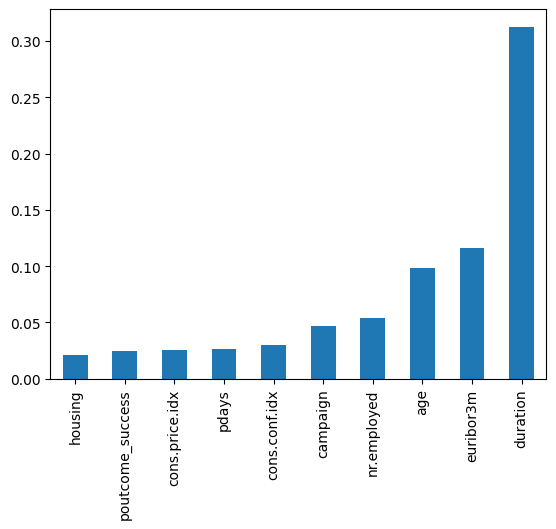

In [54]:
X_train_res, X_res, y_train_res, y_test_res = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_res, y_train_res)
y_pred = rfc.predict(X_res)
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
rfc_importances.plot(kind='bar')
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_res,model_xgb.predict(X_train_res))
cm

array([[22983,  1967],
       [   21,  3152]], dtype=int64)

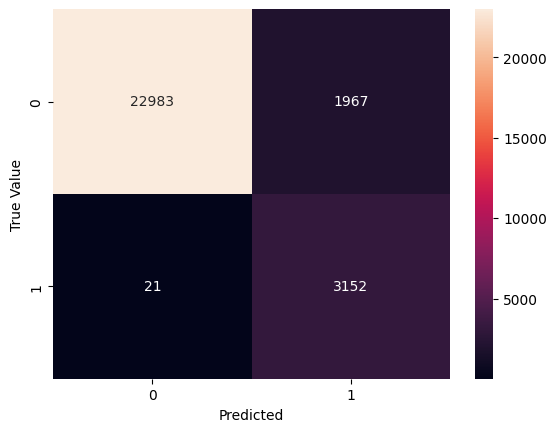

In [56]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()